In [18]:
import pandas as pd 
import numpy as np
import yfinance
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
#%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import xlsxwriter  
import requests
import math #The Python math module


plt.rcParams['figure.figsize'] = [14, 7]
plt.rc('font', size=14)

In [19]:
symbol ="AAPL TSLA SPY"
num_name= symbol.split(' ') 
ticker = yfinance.Tickers(symbol)
df_level=ticker.history(interval='1d',start="2020-03-15",end="2021-01-30")
df_level['Date'] = pd.to_datetime(df_level.index) # just to crate another column for date!!!
df_level['Date'] = df_level['Date'].apply(mpl_dates.date2num)
df_level = df_level.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
df_level= df_level
%store df_level

[*********************100%***********************]  3 of 3 completed
Stored 'df_level' (DataFrame)


In [20]:


def chunks(lst,n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
        

In [21]:
all_levels_Low=[]
all_levels_High=[]
for i in num_name:
        for row in range(2,df_level.shape[0]-2): # as an example!
            all_levels_Low.append(df_level["Low"][i][row])
            all_levels_High.append(df_level["High"][i][row])
          
print(len(all_levels_High)/len(num_name),(len(all_levels_Low)/len(num_name)))
# can include a check statement! high/low elements has to be equal!

218.0 218.0


In [22]:
filter_num= int(len(all_levels_Low)/len(num_name))

stock_levels_Low = list(chunks(all_levels_Low,filter_num))

for level in stock_levels_Low:
         print(level)
         print(" ")


[58.911922794184385, 60.27590185830841, 56.646078440051774, 52.82247292901352, 58.21130021792691, 60.69577958258073, 61.20758276129721, 61.379008398313616, 61.962858024168284, 62.60882509961357, 59.41130189423649, 58.85726014233742, 59.37155487116473, 61.957888284481314, 64.34796512811079, 64.90199854174847, 65.76411724808642, 66.04485085298803, 69.0808804731757, 69.72188677847944, 70.14920830979882, 68.78523668440873, 68.78274745411608, 65.94547407322415, 67.62746812853693, 68.29082911677524, 68.82001994961153, 69.55294146769072, 69.11815117726475, 70.53182442998316, 71.6398991524139, 71.01878463289039, 71.13554902027846, 73.15791116223113, 74.25357124731809, 75.02375886782538, 75.8048125414726, 76.53970310807112, 77.45397686387416, 75.53575867085415, 75.11723047420676, 74.7883897708636, 77.30699948143557, 77.97713463432576, 78.85154334359196, 78.68961338155076, 78.5600753485173, 78.84656160329386, 77.99706154473988, 78.62983023286604, 78.83909227585956, 79.0234377481981, 79.451923469

In [23]:
filter_num= int(len(all_levels_High)/len(num_name))

stock_levels_High=list(chunks(all_levels_High,filter_num))

for level in stock_levels_High:
         print(level)
         print(" ")

[62.11193067572119, 62.817520987498376, 62.56658788280836, 56.770307274492, 61.53801496071973, 64.16162456568044, 64.26845681591283, 63.57031526076951, 63.48336060361288, 65.21503924199706, 61.79391451482442, 60.90695372057558, 61.04360704750156, 65.36907033346183, 67.50325448187382, 66.42746355092864, 67.09828034677248, 68.0001406830012, 71.61505006509638, 71.13803427189309, 71.6026288442353, 71.29208101774257, 69.98274651238845, 68.88212783524533, 69.0436154935251, 70.00015078200254, 70.31319320581252, 70.69331557987375, 71.01380070463597, 71.96785189862004, 73.17530419033399, 74.28587074279955, 72.96660740085554, 74.78276132189235, 75.33928660545327, 75.81879461052799, 77.31448083826508, 78.98357215016061, 79.6412523272123, 78.70955623723079, 77.17496622121547, 76.70412514375788, 78.84656083521816, 79.3497820904854, 79.59890413672203, 79.9402019217359, 79.5266631717194, 80.77474996608545, 79.39711619408533, 80.57545888873267, 80.00497331669462, 80.30391956950653, 80.57545828552101, 

In [30]:
def isSupport(level,i):
  support = level[i] < level[i-1]  and level[i] < level[i+1] \
  and level[i+1] < level[i+2] and level[i-1] < level[i-2]

  return support

def isResistance(level,i):
   resistance = level[i] > level[i-1]  and level[i] > level[i+1] \
   and level[i+1] > level[i+2] and level[i-1] > level[i-2] 

   return resistance

In [31]:
# for one stock!!!!!!!!!  do this for many stocks loop!
sorted_level=[]
for i in range(2,len(stock_levels_Low[0])-2):
    if isSupport(stock_levels_Low[0],i):
            sorted_level.append((i,stock_levels_Low[0][i]))
    elif isResistance(stock_levels_High[0],i):
            sorted_level.append((i,stock_levels_High[0][i]))
        
sorted_level

[(3, 52.82247292901352),
 (6, 64.26845681591283),
 (11, 58.85726014233742),
 (23, 65.94547407322415),
 (38, 79.6412523272123),
 (41, 74.7883897708636),
 (58, 88.38038980434446),
 (61, 82.85241220235754),
 (65, 85.98385593228683),
 (67, 92.76740604370178),
 (71, 87.51096901155209),
 (84, 95.50274544038218),
 (86, 98.90074322887304),
 (95, 111.24464921301686),
 (101, 108.91958150897814),
 (117, 137.7423602457857),
 (119, 110.69901460653563),
 (123, 109.81055055345807),
 (125, 118.62534572744616),
 (132, 104.81915966400773),
 (145, 125.17404616714177),
 (159, 107.1351648390952),
 (165, 114.12999725341797),
 (175, 112.58999633789062),
 (185, 125.94999694824219),
 (186, 120.1500015258789),
 (191, 129.5800018310547),
 (193, 123.44999694824219),
 (198, 138.7899932861328),
 (205, 132.6300048828125),
 (207, 126.86000061035156),
 (211, 126.94000244140625)]

In [29]:
#FOR MULTIPLE STOCKS!-----     it worked but rows are different
lists = [[] for i in range(len(num_name))]
for sublist in range(len(lists)):
    for i in range(2,len(stock_levels_Low[0])-2):
        if isSupport(stock_levels_Low[sublist],i):
                lists[sublist].append((i,stock_levels_Low[sublist][i]))
        elif isResistance(stock_levels_High[sublist],i):
                lists[sublist].append((i,stock_levels_High[sublist][i]))

len(lists)

3

In [27]:
AAPL_levels = lists[0]
AAPL_levels
%store lists

Stored 'lists' (list)


In [34]:
%store -r data_frames_separate
data_frames_separate

[               Date        Open        High         Low       Close
 Date                                                               
 2020-03-16  18337.0   60.111926   64.367833   59.627454   60.176525
 2020-03-17  18338.0   61.493294   64.002614   59.229935   62.822491
 2020-03-18  18339.0   59.570312   62.111931   58.911923   61.284599
 2020-03-19  18340.0   61.463482   62.817521   60.275902   60.815033
 2020-03-20  18341.0   61.411304   62.566588   56.646078   56.954155
 ...             ...         ...         ...         ...         ...
 2021-01-25  18652.0  143.070007  145.089996  136.539993  142.919998
 2021-01-26  18653.0  143.600006  144.300003  141.369995  143.160004
 2021-01-27  18654.0  143.429993  144.300003  140.410004  142.059998
 2021-01-28  18655.0  139.520004  141.990005  136.699997  137.089996
 2021-01-29  18656.0  135.830002  136.740005  130.210007  131.960007
 
 [222 rows x 5 columns],
                Date        Open        High         Low       Close
 Date  

In [42]:
def plot_all(stock_name):
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,data_frames_separate[stock_name].values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for i in lists[stock_name]:
    plt.hlines(i[1],xmin=data_frames_separate[stock_name]['Date'][i[0]],\
               xmax=max(data_frames_separate[stock_name]['Date']),colors='blue')

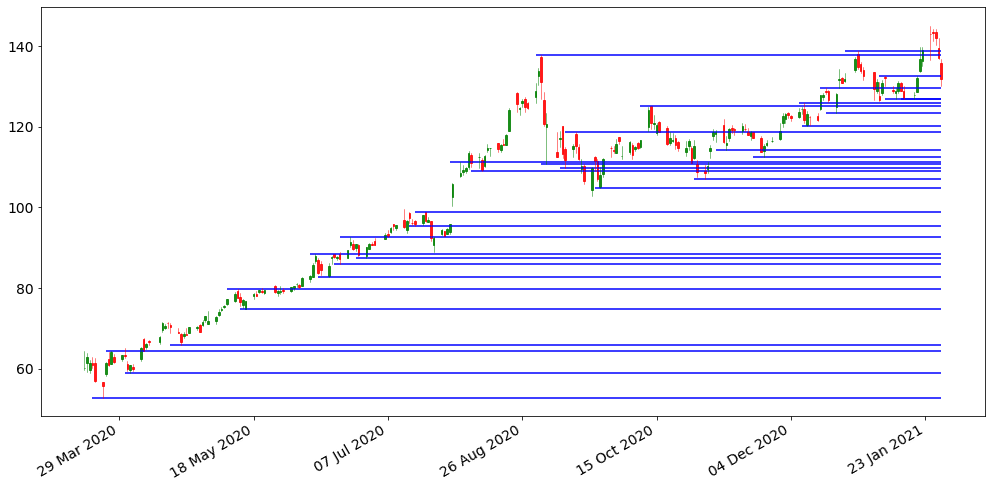

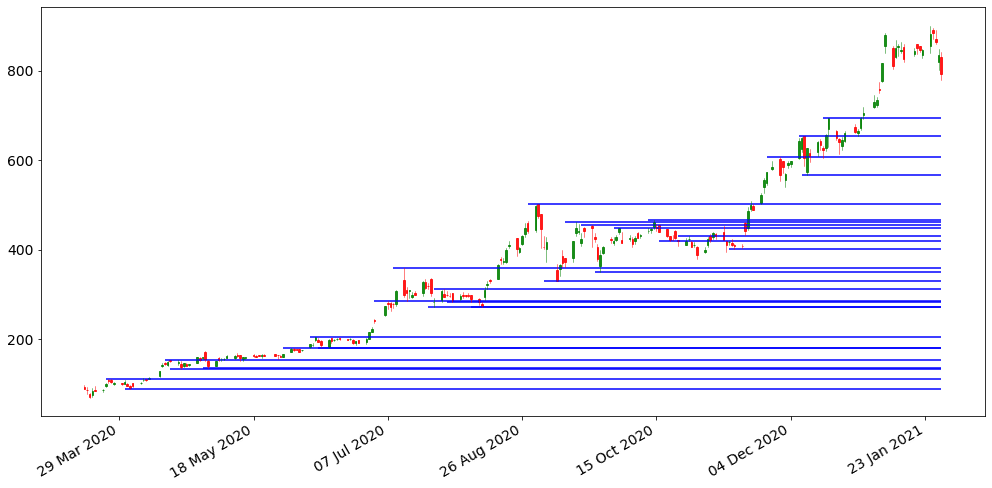

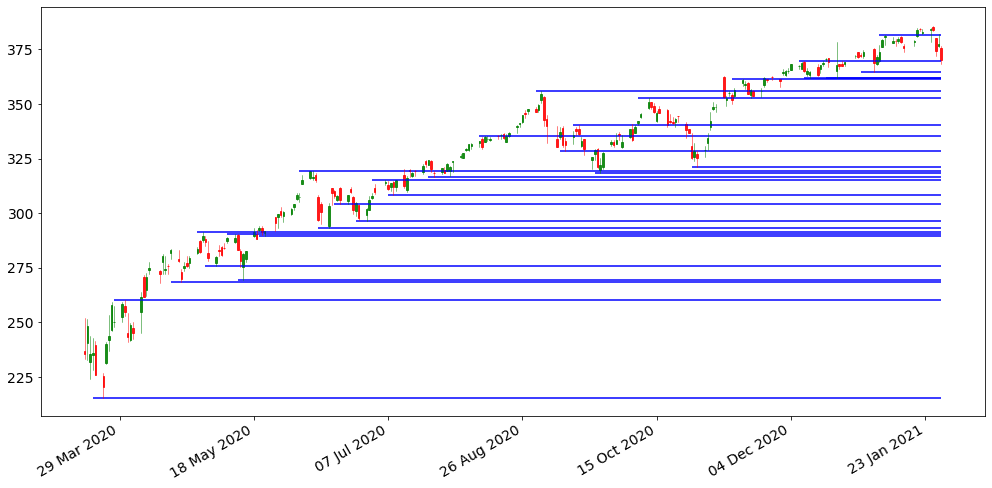

In [43]:
for i in range(len(num_name)):
    plot_all(i)

